In [1]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve

In [2]:
# 混淆矩阵
def plot_confusion_matrix(cm, classes, normalize = False, title = 'Confusion matrix"', cmap = plt.cm.Blues) :
    plt.figure()
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 0)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])) :
        plt.text(j, i, cm[i, j],
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [3]:
# 画precision-recall曲线
def plot_precision_recall():
    plt.step(recall, precision, color = 'b', alpha = 0.2, where = 'post')
    plt.fill_between(recall, precision, step ='post', alpha = 0.2, color = 'b')
    plt.plot(recall, precision, linewidth=2)
    plt.xlim([0.0,1])
    plt.ylim([0.0,1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall curve')
    plt.show();


## 读取数据

In [4]:
data = pd.read_csv('data/credit_fraud/creditcard.csv')

## 数据预处理
属性Amount进行标准化，label和数据分开

In [5]:
data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))
y = np.array(data.Class.tolist())
data = data.drop(['Time','Class'], axis=1)
# x = np.array(data.as_matrix())
x = data

训练集测试集分组

In [6]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.1)

## 建立模型

In [7]:
# 这里使用简单的逻辑回归模型
clf = LogisticRegression()
clf.fit(train_x, train_y)
predict_y = clf.predict(test_x)

## 模型评估
### 混淆矩阵

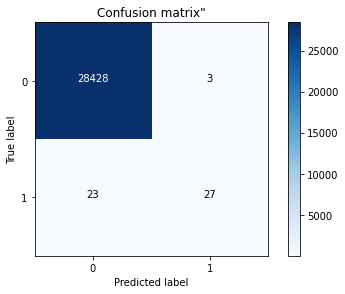

In [8]:
# 计算混淆矩阵
cm = confusion_matrix(test_y, predict_y)
plot_confusion_matrix(cm, classes=[0, 1], normalize = False, title = 'Confusion matrix"', cmap = plt.cm.Blues)

### Precision-Recall Curve

In [9]:
# 预测样本置信分数
y_score = clf.decision_function(test_x)

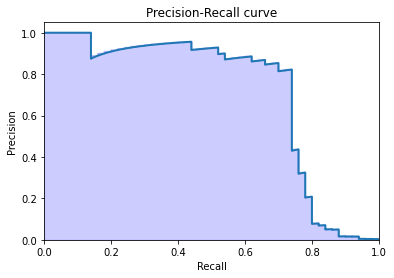

In [10]:
# 计算准确率，召回率，阈值可视化
precision, recall, thresholds = precision_recall_curve(test_y, y_score)
plot_precision_recall()

逻辑回归可用于判断特征重要性

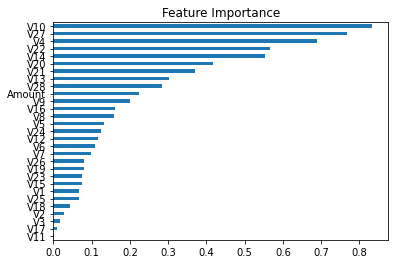

In [11]:
# 显示模型中特征重要性
coeffs = clf.coef_
df_co = pd.DataFrame(np.transpose(abs(coeffs)), columns=["coef_"])
# 下标设置为Feature Name
df_co.index = data.columns
df_co.sort_values("coef_", ascending=True, inplace=True)
df_co.coef_.plot(kind="barh")
plt.title("Feature Importance")
plt.show()